 # PIA: Entrenamiento de una red neuronal convolucional

Inteligencia Artificial y Redes Neuronales -
N1

Grupo 007

---

### Objetivo:

Entrenar una red neuronal convolucional (CNN) en un conjunto de imágenes de libre elección.

---

1. Cargar Librerías

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import zipfile
import glob
import cv2
import os
from PIL import Image
from random import shuffle
from google.colab import files
from keras.models import Sequential
from keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
print(tf.__version__)

2.15.0


In [ ]:
!pip install kaggle

2. Cargar Datos

In [ ]:
!kaggle datasets download -d anshtanwar/microscopic-fungi-images

Dataset URL: https://www.kaggle.com/datasets/anshtanwar/microscopic-fungi-images
License(s): Attribution 4.0 International (CC BY 4.0)
microscopic-fungi-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
zip_file_path = '/content/microscopic-fungi-images.zip'

extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extracted_folder_path)

In [ ]:
def get_label_from_folder(folder_name):
    if folder_name == 'H1':
        return 0
    elif folder_name == 'H2':
        return 1
    elif folder_name == 'H3':
        return 2
    elif folder_name == 'H5':
        return 3
    elif folder_name == 'H6':
        return 4

3. Preprocesamiento de Datos

In [ ]:
image_data = []
image_labels = []

In [ ]:
root_dir = '/content/Dataset/'

for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            print(file_path)
            images_folder = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            # Formato de imagen
            img_resized = cv2.resize(images_folder, (150,150))
            img_resized = cv2.bitwise_not(img_resized)

            # Obtener la carpeta padre de la imagen
            folder_name = os.path.basename(os.path.dirname(file_path))

            # Asignar la etiqueta correspondiente
            label_index = get_label_from_folder(folder_name)

            # Guardar imagenes y etiquetas
            image_data.append(img_resized)
            image_labels.append(label_index)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/content/Dataset/train/H5/aug-209-H5_139a_8.jpg.jpg
/content/Dataset/train/H5/H5_72a_3.jpg.jpg
/content/Dataset/train/H5/H5_16a_2.jpg.jpg
/content/Dataset/train/H5/aug-151-H5_129b_4.jpg.jpg
/content/Dataset/train/H5/H5_15a_10.jpg.jpg
/content/Dataset/train/H5/H5_141a_3.jpg.jpg
/content/Dataset/train/H5/H5_57a_3.jpg.jpg
/content/Dataset/train/H5/aug-186-H5_136a_2.jpg.jpg
/content/Dataset/train/H5/H5_105a_2.jpg.jpg
/content/Dataset/train/H5/H5_17a_3.jpg.jpg
/content/Dataset/train/H5/H5_72a_1.jpg.jpg
/content/Dataset/train/H5/aug-315-H5_23a_4.jpg.jpg
/content/Dataset/train/H5/aug-177-H5_133a_4.jpg.jpg
/content/Dataset/train/H5/H5_33a_1.jpg.jpg
/content/Dataset/train/H5/aug-347-H5_2c_4.jpg.jpg
/content/Dataset/train/H5/H5_97a_3.jpg.jpg
/content/Dataset/train/H5/aug-252-H5_15a_3.jpg.jpg
/content/Dataset/train/H5/aug-344-H5_2b_4.jpg.jpg
/content/Dataset/train/H5/H5_71a_1.jpg.jpg
/content/Dataset/train/H5/aug-247-H5_14a_3.jpg.

In [ ]:
#Cantidades de datos

print('Data: ', len(image_data))
print('Label: ', len(image_labels))

Data:  6801
Label:  6801


In [ ]:
#Reacomodo de datos de forma aleatoria

par = list(zip(image_data, image_labels))

shuffle(par)

image_data, image_labels = zip(*par)

image_data = list(image_data)
image_labels = list(image_labels)

In [ ]:
def hongo(image_labels):
  if image_labels == 0:
        return 'Candida albicans'
  elif image_labels == 1:
        return 'Aspergillus niger'
  elif image_labels == 2:
        return 'Trichophyton rubrum'
  elif image_labels == 3:
        return 'Trichophyton mentagrophytes'
  elif image_labels == 4:
        return 'Epidermophyton floccosum'

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=42)

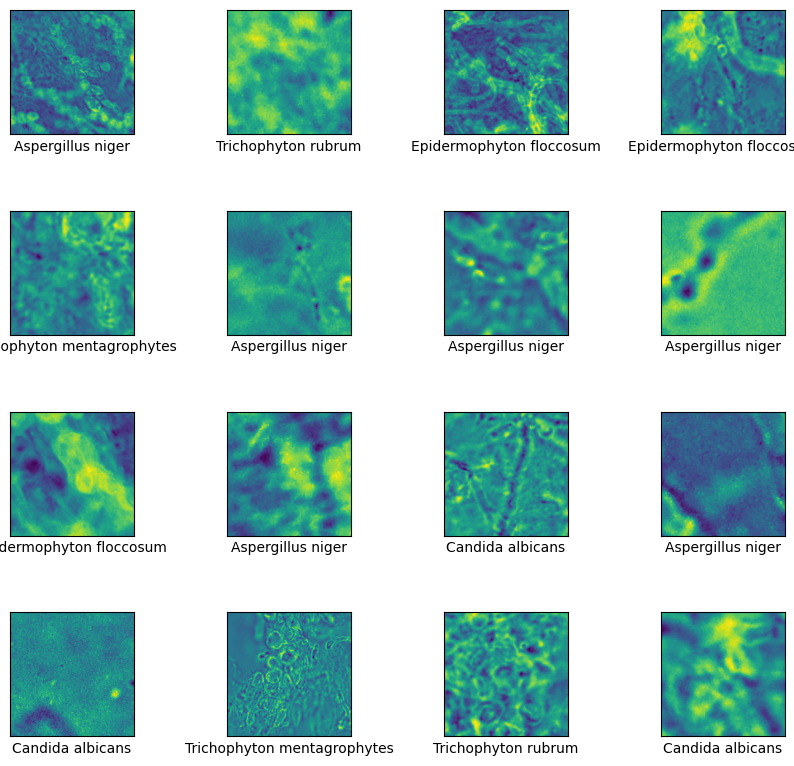

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace=0.75)
    plt.grid(False)
    plt.imshow(data_train[i])
    plt.xlabel(hongo(label_train[i]))
plt.show()

In [ ]:
data_train = np.array(data_train) / 255.0
data_test = np.array(data_test) / 255.0
label_train = np.array(label_train)
label_test = np.array(label_test)

In [ ]:
print('Data_train: ', len(data_train))
print('Data_test: ', len(data_test))

Data_train:  5440
Data_test:  1361


In [ ]:
data_train = np.expand_dims(data_train, axis=-1)
data_test = np.expand_dims(data_test, axis=-1)

In [ ]:
data_train = np.repeat(data_train, 3, axis=-1)
data_test = np.repeat(data_test, 3, axis=-1)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(5440, 150, 150, 3)
(1361, 150, 150, 3)


4. Selección y Entrenamiento del Modelo

In [ ]:
#Parte convolucional

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compliación del modelo: características
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Entrenamiento de la RNAC
history = model.fit(data_train, label_train, epochs=25,
                    validation_data=(data_test, label_test))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


170/170 [==============================] - 259s 2s/step - loss: 1.6345 - accuracy: 0.2502 - val_loss: 1.6073 - val_accuracy: 0.2557
Epoch 2/25
170/170 [==============================] - 250s 1s/step - loss: 1.6019 - accuracy: 0.2724 - val_loss: 1.6082 - val_accuracy: 0.2557
Epoch 3/25
170/170 [==============================] - 253s 1s/step - loss: 1.5953 - accuracy: 0.2719 - val_loss: 1.5786 - val_accuracy: 0.2586
Epoch 4/25
170/170 [==============================] - 246s 1s/step - loss: 1.5455 - accuracy: 0.3199 - val_loss: 1.4445 - val_accuracy: 0.3409
Epoch 5/25
170/170 [==============================] - 249s 1s/step - loss: 1.4396 - accuracy: 0.3721 - val_loss: 1.4451 - val_accuracy: 0.3630
Epoch 6/25
170/170 [==============================] - 241s 1s/step - loss: 1.4117 - accuracy: 0.3844 - val_loss: 1.4486 - val_accuracy: 0.3644
Epoch 7/25
170/170 [==============================] - 245s 1s/step - loss: 1.3954 - accuracy: 0.3915 - val_loss: 1.4448 - val_accuracy: 0.3806
Epoch 8/25

5. Pruebas del Modelo

43/43 - 16s - loss: 3.2144 - accuracy: 0.4754 - 16s/epoch - 377ms/step


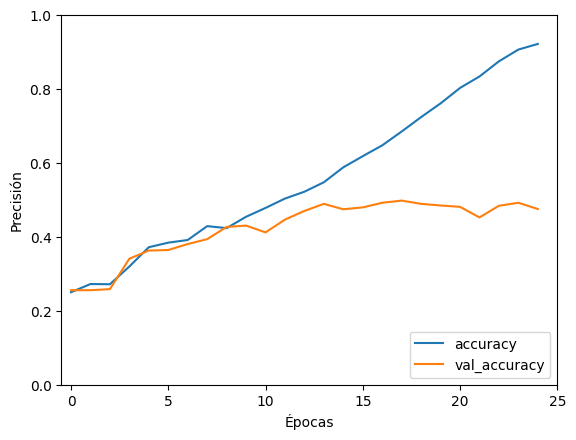

In [27]:
#Gráfica

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.xlim([-0.5, 25])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(data_test, label_test, verbose=2)

In [51]:
predictions = model.predict(data_test)

43/43 [==============================] - 17s 394ms/step


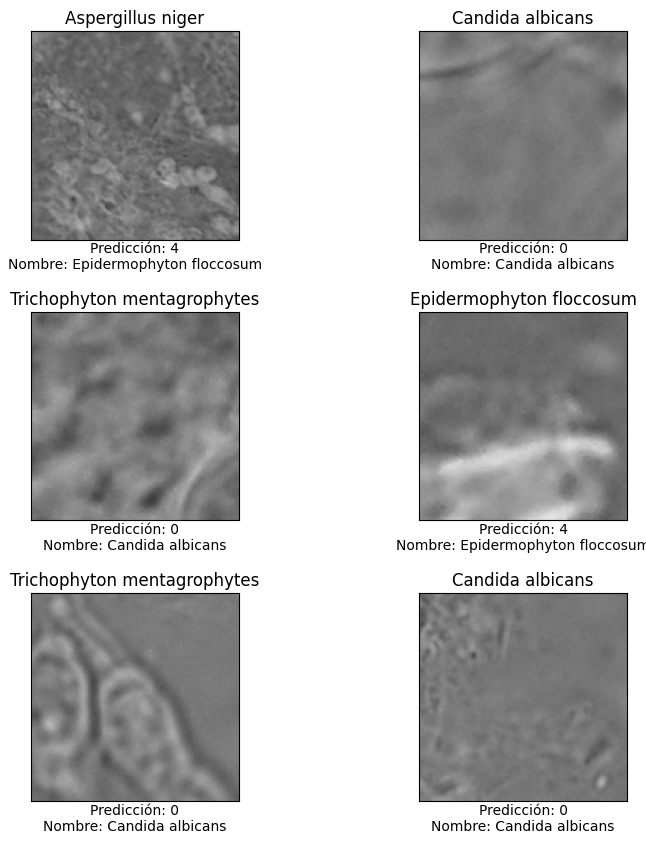

In [52]:
plt.figure(figsize=(10,10))
for i in range(20, 26, 1):
  plt.subplot(3, 2, i-19)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.subplots_adjust(wspace=0.005)
  plt.subplots_adjust(hspace=0.35)
  plt.imshow(data_test[i])
  xlabel = 'Predicción: {}\nNombre: {}'.format(tf.argmax(predictions[i]), hongo(tf.argmax(predictions[i])))
  plt.xlabel(xlabel, labelpad=1)
  plt.title(hongo(label_test[i]))
plt.show()